In [33]:
#import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
from matplotlib import font_manager
from matplotlib.patches import Patch

In [295]:
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\BRIDGEB.ttf')
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\EuropeanTypewriter.ttf')

# London LAs

In [38]:
# read in London Local Authorities shapefile
london_la = gpd.GeoDataFrame.from_file("London_Borough_Excluding_MHW.geojson")
london_la = london_la.to_crs(epsg=4326) #need to convert before used in osmnx

# CIty of London

In [219]:
#buildings
buildings = ox.geometries_from_place("City of London", tags={'building': True})

#banks
banks = ox.geometries_from_place("City of London", tags={'amenity': ['bank']})

#places of worship
worship = ox.geometries_from_place("City of London", tags= {'amenity': ['place_of_worship']})
                                   
#pubs
pubs = ox.geometries_from_place("City of London", tags= {'amenity': ['pub']})

In [220]:
#remove points to only keep buildings
banks = banks.reset_index()
banks = banks[(banks["element_type"]=="way") | (banks["element_type"]=="relation")  ]

worship = worship.reset_index()
worship = worship[(worship["element_type"]=="way") | (worship["element_type"]=="relation") ]

pubs = pubs.reset_index()
pubs = pubs[(pubs["element_type"]=="way") | (pubs["element_type"]=="relation")]

In [203]:
#get other financial buildings that are not tagged as banks
financial = buildings.reset_index()
financial = financial[(financial["element_type"]=="way") | (financial["element_type"]=="relation")]
financial = financial[(financial["name"].str.contains("Bank")) | (financial["name"].str.contains("bank")) | (financial["name"].str.contains("Investment"))]
financial = financial[(financial["amenity"]!="bank") & (financial["name"]!="Bank station - Cannon Street entrance")]

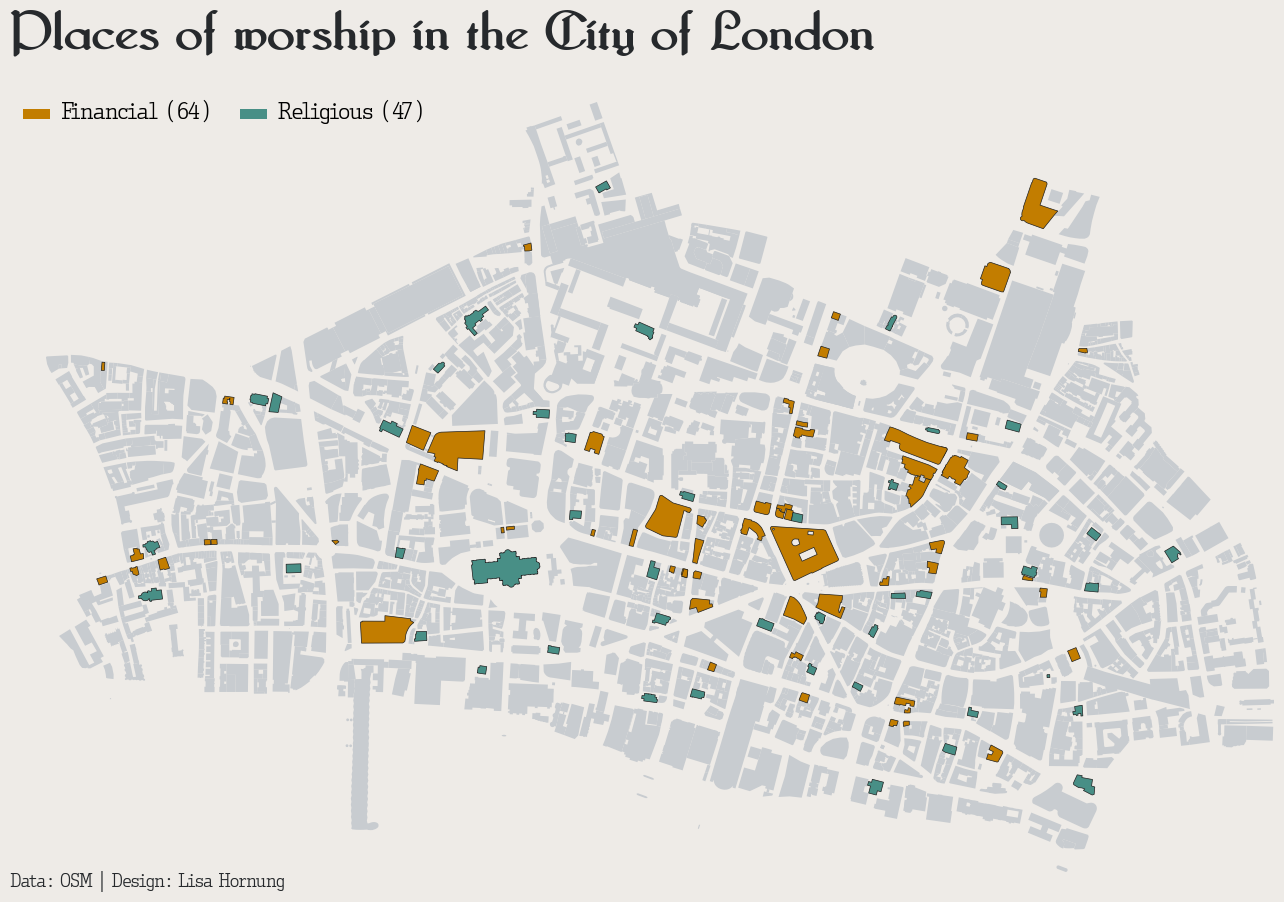

In [311]:
#Plot roads network
fig, ax = plt.subplots(figsize=(13,8), layout="tight")

c = {"bg": "#eeebe7", "building": "#c8ccd0", "pub": "#040F16", "bank":"#c27d00", "worship": "#488f86", 
     "footer": "#2f3337", "title": "#26292c"}
#81a36d
#c27d00
#9d605b
#839B85
fig.set_facecolor(c["bg"])
ax.set_facecolor(c["bg"])

#get boundaries of map
xmin, ymin, xmax, ymax = buildings.geometry.total_bounds

#plot buildings and amenities
ox.plot_footprints(buildings, ax=ax, color=c["building"], edge_linewidth=0, show=False, close=False,
                   bbox = (ymax, ymin, xmax, xmin))
ox.plot_footprints(banks, ax=ax, color=c["bank"], edge_color="#222222", edge_linewidth=0.5,bbox = (ymax, ymin, xmax, xmin),
                   show=False, close=False)
ox.plot_footprints(financial, ax=ax, color=c["bank"], edge_color="#222222", edge_linewidth=0.5,bbox = (ymax, ymin, xmax, xmin),
                   show=False, close=False)
ox.plot_footprints(worship, ax=ax, color=c["worship"], edge_color="#222222", edge_linewidth=0.5, bbox = (ymax, ymin, xmax, xmin),
                   show=False, close=False)

#title and legend
plt.figtext(0,1.05,'Places of worship in the City of London', fontsize = 34, color=c["title"], fontproperties=title_font)
plt.figtext(0,0.0,'Data: OSM | Design: Lisa Hornung', fontsize = 15, color=c["title"],fontproperties=label_font)


legend_elements = [ Patch(facecolor=c["bank"],label='Financial (' + str((len(banks)+len(financial))) + ")"), 
                    Patch(facecolor=c["worship"], label='Religious (' + str(len(worship)) + ")")]
L = fig.legend(handles=legend_elements,ncol=2, frameon=False, loc='upper left',bbox_to_anchor=(0,1.0), labelspacing=1)
plt.setp(L.texts, fontsize=19, fontproperties=label_font)

#save outfile
plt.savefig("city-london-places-of-worship.png", dpi=300, bbox_inches="tight", pad_inches=0.15)

plt.show()

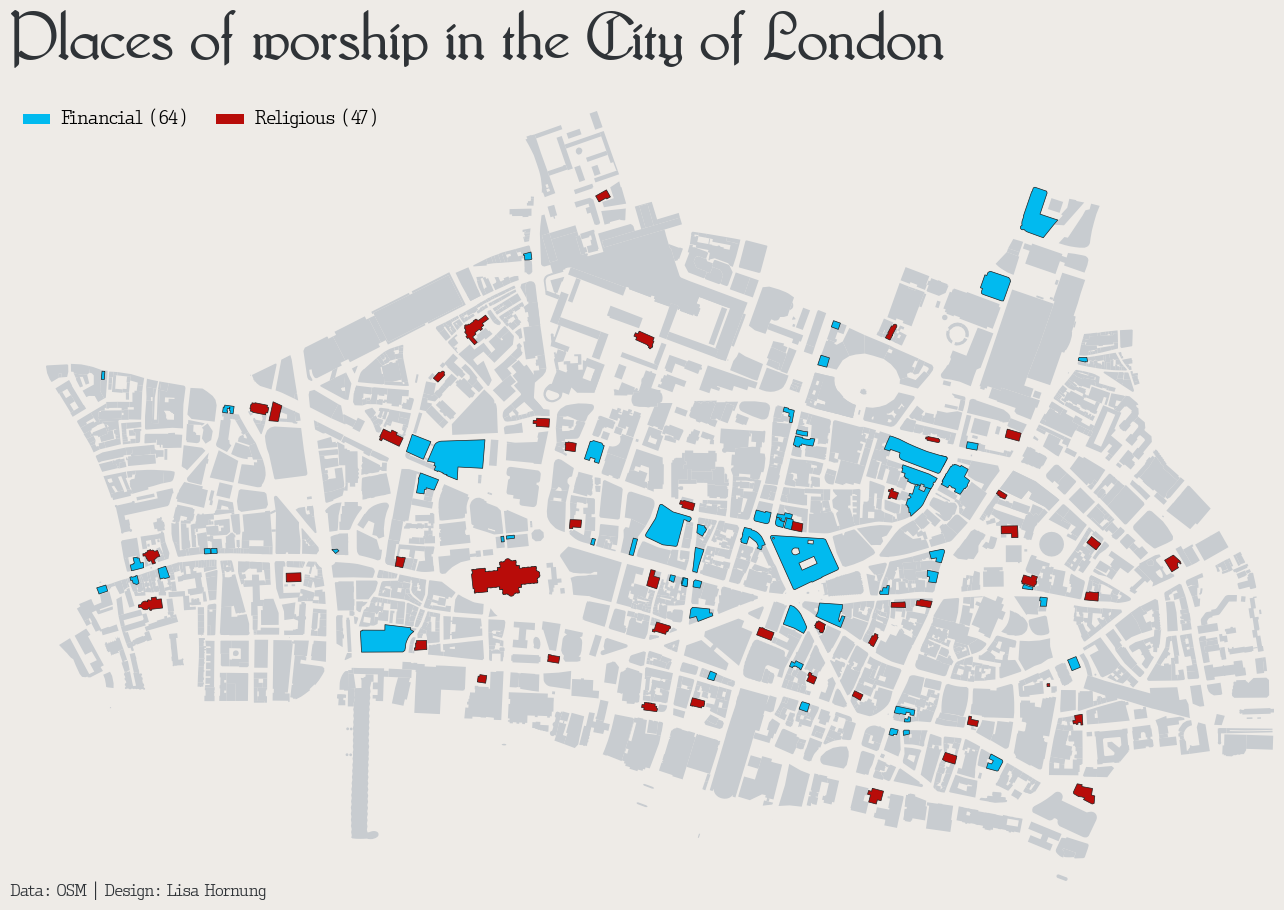

In [279]:
#Plot roads network
fig, ax = plt.subplots(figsize=(13,8), layout="tight")

c = {"bg": "#eeebe7", "building": "#c8ccd0", "pub": "#040F16", "bank":"#01BAEF", "worship": "#B80C09", 
     "footer": "#5e666e", "title": "#2f3337"}

fig.set_facecolor(c["bg"])
ax.set_facecolor(c["bg"])

#get boundaries of map
xmin, ymin, xmax, ymax = buildings.geometry.total_bounds

#plot buildings and amenities
ox.plot_footprints(buildings, ax=ax, color=c["building"], edge_linewidth=0, show=False, close=False,
                   bbox = (ymax, ymin, xmax, xmin))
ox.plot_footprints(banks, ax=ax, color=c["bank"], edge_color="#222222", edge_linewidth=0.5,bbox = (ymax, ymin, xmax, xmin),
                   show=False, close=False)
ox.plot_footprints(financial, ax=ax, color=c["bank"], edge_color="#222222", edge_linewidth=0.5,bbox = (ymax, ymin, xmax, xmin),
                   show=False, close=False)
ox.plot_footprints(worship, ax=ax, color=c["worship"], edge_color="#222222", edge_linewidth=0.5, bbox = (ymax, ymin, xmax, xmin),
                   show=False, close=False)

#title and legend
plt.figtext(0,1.05,'Places of worship in the City of London', fontsize = 40, color=c["title"], fontproperties=title_font)
plt.figtext(0,0.0,'Data: OSM | Design: Lisa Hornung', fontsize = 14, color=c["title"],fontproperties=label_font)


legend_elements = [ Patch(facecolor=c["bank"],label='Financial (' + str((len(banks)+len(financial))) + ")"), 
                    Patch(facecolor=c["worship"], label='Religious (' + str(len(worship)) + ")")]
L = fig.legend(handles=legend_elements,ncol=2, frameon=False, loc='upper left',bbox_to_anchor=(0,1.0), labelspacing=1)
plt.setp(L.texts, fontsize=16, fontproperties=label_font)

#save outfile


plt.show()

In [211]:
#check if all churches picked up
church = buildings.reset_index()
church = church[(church["element_type"]=="way") | (church["element_type"]=="relation")]
church = church[(church["name"].str.contains("church")) | (church["name"].str.contains("Church"))]
church = church[(church["amenity"]!="place_of_worship")]

# Other explorations

In [67]:
city_name = 'Tower Hamlets'
polygon = london_la[london_la["NAME"]==city_name]["geometry"].iloc[0]

#places of worship
worship_tags = {'amenity': ['place_of_worship']}
worship = ox.geometries_from_polygon(polygon, tags=worship_tags)

#building_tags = {'building': True}
buildings = ox.geometries_from_polygon(polygon, tags={'building': True})

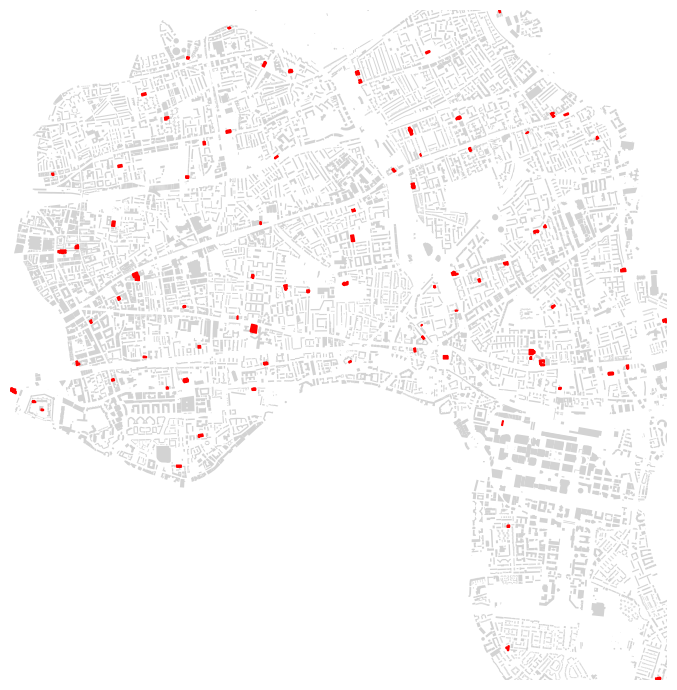

In [69]:
#Plot roads network
fig, ax = plt.subplots(figsize=(12,7), layout="tight")

#plot roads and water
ox.plot_footprints(buildings, ax=ax, color='lightgrey', edge_linewidth=0, show=False, close=False)
ox.plot_footprints(worship, ax=ax, color = "red", edge_color='red', edge_linewidth=1, show=False, close=False)

plt.show()